### ML workflow:

1. **Problem Scoping** 
2. **Data Acquisition**
3. **EDA**
    a. Clean data
    b. Visualise data (you already learned EDA / cleaning).

4. **Choose a model** – e.g., Decision Tree for classification.

5. **Train** 
    a. Train/Test split.
    b. Fit the model on training data.

6. **Test**
    a. Make predictions on test data.
    b. Compute performance (accuracy, etc.).
    c. Reiterate based on performance

## **Predict House Prices based on house parameters**

1. Predict the house prices, based on various housing parameters.
    - The problem is worth solving because real estate professionals often need help in evaluating the prices of properties.

2. Data Acquisition:
    - Use the inbuilt sci-kit learn dataset 

3. EDA 
    - Clean dataset - it is clean already - but still just recall a bit about cleaning techniques
    - - Visualise a little as well

4. Choose a model:
    - Look into data, and we infer that it is a Regression Problem. (Prices are a continous value)
    - Linear Regression (we are using it here, because it a very simple model)
    - *Next iteration, Logistic Regression (We will observe this model too. It works on classifications problems tho)*

5. Training 
    - Train-test split of 8:2 - 80% data for training
    - Fit data into the model, model learns the patterns in data

6. Testing 
    - Make predictions
    - Observe performance using evaluation metrics
    - Regression evaluation metrics - R2 score, and Mean Absolute Error

7. Improvement -
    - Reiterate

Resources for the notebook:

- [Scikit Learn Dataset List](https://scikit-learn.org/stable/datasets/real_world.html)

## Step 1: Problem Scoping
 - write about it


## Step 2: Data Acquisition
* [Kaggle California Housing dataset Link](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

##### a very quick way of getting data from kaggle

```python
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "camnugent/california-housing-prices",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

In [75]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learniing
from sklearn.linear_model import LinearRegression, LogisticRegression
# Model Training
from sklearn.model_selection import train_test_split
# Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score


In [76]:
import sklearn
sklearn.__version__

'1.8.0'

In [77]:
housing_data = fetch_california_housing()

housing_data.feature_names

# Input features
df = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)

# Target feature
df['Price'] = housing_data.target

# Check the dataset
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### **About the Dataset:**
- `MedInc` - Median income of the households in the block - 10s thousands
- `HouseAge` - The age of house - years
- `AveRooms` - # of Rooms
- `AveBedrms` - # of Bed Rooms
- `Population` - # of people within the block of the property
- `AveOccup` - # of people living in the housing
- `Latitude` - Location cordinates Latitude
- `Longitude` - Location cordinates Longitude
- `HousePrice` - Will mention the price of the property - 10s thousands

> Exercise:
- turn the price columns into 10 thousand units, i.e. multiply all records with 10 thousand
- turn them back to ones units


## Step 3: EDA (Exploratory Data Analysis)
- Explore the data
- Clean the data
- Visualizations

In [78]:
df.shape

(20640, 9)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [80]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [82]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

**No cleaning needed. Already Cleaned**

**Visualization**

In [ ]:
# specify the defaults for the visualizations

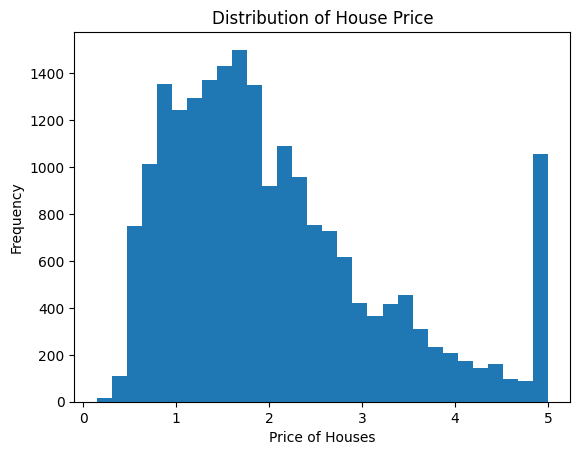

In [83]:
plt.hist(df['Price'], bins=30)

# important stuff you should always keep for visualization
plt.title('Distribution of House Price')
plt.xlabel('Price of Houses')
plt.ylabel('Frequency')
plt.show()


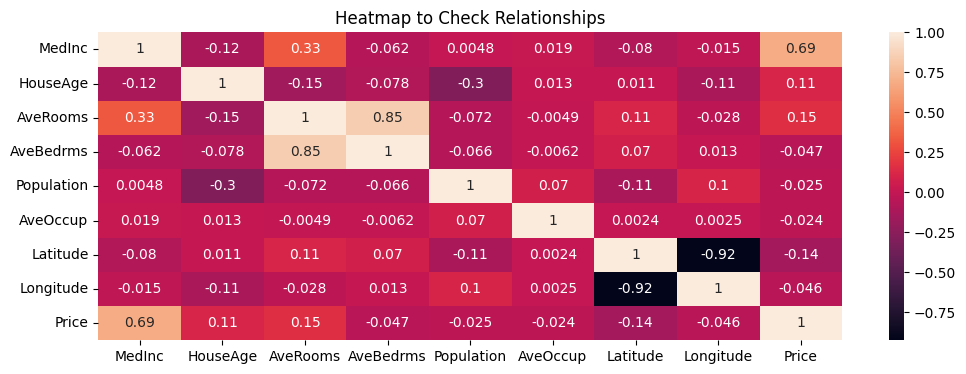

In [84]:
# exploring 
# i am trying to know about the important features of the dataset
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap to Check Relationships')
plt.show()

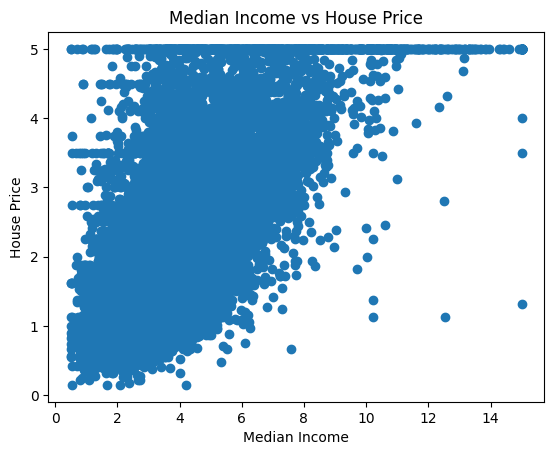

In [85]:
plt.scatter(df['MedInc'], df['Price'])

plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

Insight
 * Insights needed for machine learning later

> Exercise
- To make better visualization
- Get more insight and record them
- To create all the visualization in a single plot,using subplot an figsize to manipulate visualization

## Step 4: Choosing the Model

- Choosing Linear Regression
- Linear Regression 
- How it works

In [44]:
model = LinearRegression()
model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Step 5: Training
 - Train Test Split of data
 - Fit the model with data

```python
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
# input features
X = df[['MedInc',	'HouseAge',	'AveRooms'	,'AveBedrms','Population',	'AveOccup'	,'Latitude'	,'Longitude']]
# X = df[['MedInc',	'HouseAge',	'AveRooms'	,'Latitude']]

# target
y = df['Price']

In [ ]:
# first 15K data pieces for training
x_train =
y_train =

# Rest fof testing
x_test =
y_yest =

In [54]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [88]:
# first 15K data pieces for training
# iloc

X_train = X.iloc[0:15000]
y_train = y.iloc[0:15000]

# Rest for testing
X_test = X.iloc[15000:]
y_test = y.iloc[15000:]


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 
# seed  - in random package??
# replicate the result

In [90]:
X_train.shape
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [91]:
# fit the data in the model

model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [92]:
# check which features came to be the most important for the model
feature_importance =  pd.DataFrame({
'Features': housing_data.feature_names, 
#'Features': ['MedInc',	'HouseAge',	'AveRooms'	,'Latitude'],
'Model Coefficients': model.coef_
}).sort_values('Model Coefficients', ascending=False)
feature_importance


feature_importance
# how much weight was assigned to each feature

,Features,Model Coefficients
3,AveBedrms,0.783145
0,MedInc,0.448675
1,HouseAge,0.009724
4,Population,-0.000002
5,AveOccup,-0.003526
2,AveRooms,-0.123323
6,Latitude,-0.419792
7,Longitude,-0.433708


## step 6: Testing
 - make prediction
 - Evaluation - Calculate the performance of the model

In [93]:
y_predict1 = model.predict(X_test)
y_predict1

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [94]:
# the model, does not know anything about these
y_test, X_test

(20046    0.47700
 3024     0.45800
 15663    5.00001
 20484    2.18600
 9814     2.78000
           ...   
 15362    2.63300
 16623    2.66800
 18086    5.00001
 2144     0.72300
 3665     1.51500
 Name: Price, Length: 4128, dtype: float64,
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
 3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
 15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
 20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
 9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   
 ...       ...       ...       ...        ...         ...       ...       ...   
 15362  4.6050      16.0  7.002212   1.066372      1351.0  2.988938     33.36   
 16623  2.7266      28.0  6.131915   1.256738      1650.0  2.340426     35.36   
 18086  9.2298      25.0  7.2

In [98]:
model.predict([[8.3252,     41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88,           -122.23],
               [3.2596 ,	33.0,	5.017657,	1.006421,	2300.0	,3.691814	,32.71,	-117.03],
               [3.2596 ,	33.0,	5.017657,	1.006421,	2300.0	,3.691814	,32.71,	-117.03],
               [3.2596 ,	33.0,	5.017657,	1.006421,	2300.0	,3.691814	,32.71,	-117.03]])

C:\Users\60197\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.15194306, 1.93725874, 1.93725874, 1.93725874])

##### Evaluation

In [97]:
# evaluation metrics
r2 = r2_score(y_test, y_predict1) # 0.575

mae = mean_absolute_error(y_test, y_predict1) # 0.53
mae

0.5332001304956555

## **Identification of flower species based on flower physical measurements**

1. Predict the species of iris flower, based on flower physical measurement.
    - The problem is worth solving because the flower species are very hard to identify, even for experts.

2. Data Acquisition:
    - Use the inbuilt sci-kit learn dataset 

3. EDA 
    - Clean dataset - it is clean already - but still just recall a bit about cleaning techniques
    - Visualise a little as well

4. Choose a model:
    - Look into data, and we infer that it is a Classification Problem

    - Linear Regression ()
    - Next iteration, Logistic Regression